## LIBRARIES & FILES

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans 
from sklearn.metrics.pairwise import cosine_similarity as cs

In [13]:
import os
import pickle
from sys import exit

for dirname, _, filenames in os.walk('./lmg'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./lmg/train.pkl
./lmg/train_cc2ftr.pkl
./lmg/test_cc2ftr.pkl
./lmg/.DS_Store
./lmg/test.pkl
./lmg/dict.pkl


## TRAIN DATA

In [14]:
train_ftr = np.array(pickle.load(open('./lmg/train_cc2ftr.pkl', 'rb')))   
ftr_tr = pd.DataFrame(train_ftr)
ftr_tr

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.539774,0.0,0.0,0.0,0.0,0.0,14.769796,0.0,0.0,1.026494
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.026949,0.0,0.0,0.0,0.0,0.0,15.635772,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.953752,0.0,0.0,0.0,0.0,0.0,15.205572,0.0,0.0,10.397999
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.614761,0.0,0.0,0.0,0.0,0.0,16.056574,0.0,0.0,9.829086
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.813009,0.0,0.0,0.0,0.0,0.0,16.260904,0.0,0.0,2.653366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.674759,0.0,0.0,0.0,0.0,0.0,15.897043,0.0,0.0,2.642303
22108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.970156,0.0,0.0,0.0,0.0,0.0,16.204073,0.0,0.0,2.448752
22109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.161940,0.0,0.0,0.0,0.0,0.0,16.655441,0.0,0.0,0.000000
22110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.216650,0.0,0.0,0.0,0.0,0.0,16.446033,0.0,0.0,1.500948


In [15]:
distance_train = cs(train_ftr, train_ftr)
dist_tr = pd.DataFrame(distance_train)
dist_tr

,0,1,2,3,4,5,6,7,8,9,...,22102,22103,22104,22105,22106,22107,22108,22109,22110,22111
0,1.000000,0.986517,0.990372,0.982473,0.985624,0.983771,0.980099,0.977639,0.988574,0.983569,...,0.973604,0.972770,0.991451,0.977904,0.984187,0.982307,0.980900,0.977812,0.979155,0.974011
1,0.986517,1.000000,0.988694,0.988077,0.990948,0.991316,0.989898,0.988307,0.982298,0.994666,...,0.982507,0.981088,0.987159,0.990562,0.988150,0.985819,0.987615,0.984998,0.985322,0.984535
2,0.990372,0.988694,1.000000,0.988775,0.988281,0.984864,0.985394,0.982128,0.989148,0.984913,...,0.974891,0.974383,0.988682,0.982455,0.987100,0.985302,0.986862,0.982036,0.982914,0.978573
3,0.982473,0.988077,0.988775,1.000000,0.995074,0.994091,0.994209,0.992541,0.980987,0.983737,...,0.988379,0.989510,0.991928,0.990882,0.993715,0.994483,0.993127,0.993054,0.993511,0.991455
4,0.985624,0.990948,0.988281,0.995074,1.000000,0.996217,0.995916,0.995594,0.979010,0.987256,...,0.991594,0.992582,0.992819,0.993609,0.995537,0.994264,0.995166,0.995142,0.995983,0.994447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22107,0.982307,0.985819,0.985302,0.994483,0.994264,0.993205,0.991468,0.990193,0.978720,0.984873,...,0.991918,0.992081,0.992256,0.992918,0.995654,1.000000,0.995706,0.996065,0.995964,0.992370
22108,0.980900,0.987615,0.986862,0.993127,0.995166,0.992789,0.992668,0.992924,0.978826,0.986726,...,0.993236,0.993291,0.992012,0.994787,0.995355,0.995706,1.000000,0.996711,0.996490,0.994466
22109,0.977812,0.984998,0.982036,0.993054,0.995142,0.994864,0.992694,0.994711,0.974539,0.982577,...,0.994898,0.995017,0.991959,0.993861,0.996158,0.996065,0.996711,1.000000,0.997008,0.996899
22110,0.979155,0.985322,0.982914,0.993511,0.995983,0.994640,0.993863,0.994973,0.974423,0.982461,...,0.995676,0.995791,0.991141,0.993831,0.995981,0.995964,0.996490,0.997008,1.000000,0.996429


In [16]:
min(dist_tr.mean()), max(dist_tr.std())

(0.9665698409080505, 0.00837560836225748)

In [17]:
pca = PCA(.99)
ftr_fork_train = train_ftr
pca.fit(ftr_fork_train)

components = pca.n_components_
print(components)

ftr_fork_train = pca.transform(ftr_fork_train)
ftr_train_pca = pd.DataFrame(ftr_fork_train)

pca_file = open("ftr_train_pca.pkl", "wb")
pickle.dump(ftr_train_pca, pca_file)
pca_file.close()

138


In [18]:
distance_train_pca = cs(ftr_fork_train, ftr_fork_train)
dist_tr_pca = pd.DataFrame(distance_train_pca)
dist_tr_pca

,0,1,2,3,4,5,6,7,8,9,...,22102,22103,22104,22105,22106,22107,22108,22109,22110,22111
0,1.000000,0.505671,0.710232,0.129133,0.227079,0.019462,-0.158765,-0.332900,0.713579,0.443957,...,-0.519455,-0.608117,0.635632,-0.250106,0.199786,-0.021987,-0.226278,-0.530621,-0.429194,-0.649385
1,0.505671,1.000000,0.523247,0.102799,0.194190,0.186355,0.112989,-0.044026,0.436256,0.752507,...,-0.451162,-0.591403,0.090441,0.206474,-0.020738,-0.296948,-0.256221,-0.569950,-0.545452,-0.449875
2,0.710232,0.523247,1.000000,0.362633,0.251606,-0.091143,-0.000955,-0.240512,0.715610,0.427595,...,-0.640668,-0.713612,0.390072,-0.142974,0.234011,0.003884,0.054637,-0.437850,-0.368323,-0.578254
3,0.129133,0.102799,0.362633,1.000000,0.351510,0.218816,0.339416,0.125067,0.220095,-0.072628,...,-0.263064,-0.164315,0.214616,-0.078746,0.172715,0.296519,-0.004600,-0.007748,0.054618,-0.070916
4,0.227079,0.194190,0.251606,0.351510,1.000000,0.286609,0.395469,0.308568,-0.004288,0.002878,...,-0.208184,-0.095350,0.103964,-0.033530,0.150206,-0.048122,-0.051658,-0.032957,0.130908,0.039496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22107,-0.021987,-0.296948,0.003884,0.296519,-0.048122,-0.162064,-0.167032,-0.392557,-0.022746,-0.190905,...,-0.065018,-0.058914,0.073437,-0.066234,0.218154,1.000000,0.159419,0.249858,0.223811,-0.161693
22108,-0.226278,-0.256221,0.054637,-0.004600,-0.051658,-0.451479,-0.138928,-0.146350,-0.096929,-0.140590,...,-0.000615,-0.008154,-0.080753,0.111067,0.007387,0.159419,1.000000,0.255982,0.194539,0.024705
22109,-0.530621,-0.569950,-0.437850,-0.007748,-0.032957,0.040530,-0.044746,0.228867,-0.467939,-0.591103,...,0.333518,0.351760,-0.084634,-0.023370,0.144429,0.249858,0.255982,1.000000,0.388562,0.529843
22110,-0.429194,-0.545452,-0.368323,0.054618,0.130908,-0.012645,0.120233,0.259492,-0.477452,-0.607791,...,0.439554,0.455409,-0.208428,-0.037785,0.101440,0.223811,0.194539,0.388562,1.000000,0.449002


In [27]:
max(dist_tr_pca.mean()), min(dist_tr_pca.std())

(0.05001787468791008, 0.11005573719739914)

## TEST DATA

In [21]:
test_ftr = np.array(pickle.load(open('./lmg/test_cc2ftr.pkl', 'rb')))   
ftr_ts = pd.DataFrame(test_ftr)
ftr_ts

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.310440,0.0,0.0,0.0,0.0,0.0,15.459288,0.0,0.0,2.623203
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.156109,0.0,0.0,0.0,0.0,0.0,15.762150,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.784758,0.0,0.0,0.0,0.0,0.0,16.382097,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.771292,0.0,0.0,0.0,0.0,0.0,15.856560,0.0,0.0,4.413645
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.775530,0.0,0.0,0.0,0.0,0.0,16.234312,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.578297,0.0,0.0,0.0,0.0,0.0,15.775608,0.0,0.0,0.000000
2212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.024078,0.0,0.0,0.0,0.0,0.0,16.241972,0.0,0.0,0.000000
2213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.001736,0.0,0.0,0.0,0.0,0.0,16.421289,0.0,0.0,0.000000
2214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.206408,0.0,0.0,0.0,0.0,0.0,16.658035,0.0,0.0,0.000000


In [22]:
distance_test = cs(test_ftr, test_ftr)
dist_ts = pd.DataFrame(distance_test)
dist_ts

,0,1,2,3,4,5,6,7,8,9,...,2206,2207,2208,2209,2210,2211,2212,2213,2214,2215
0,1.000000,0.991752,0.991214,0.992926,0.993517,0.992344,0.990838,0.988739,0.994429,0.990511,...,0.984699,0.985097,0.988210,0.985445,0.991093,0.990914,0.991704,0.989492,0.987595,0.985467
1,0.991752,1.000000,0.994692,0.991747,0.994089,0.992683,0.990979,0.989669,0.991082,0.993787,...,0.985084,0.984209,0.985449,0.990052,0.989950,0.989253,0.992437,0.990262,0.987161,0.985546
2,0.991214,0.994692,1.000000,0.992934,0.995561,0.994184,0.995075,0.995109,0.992280,0.993535,...,0.992406,0.991745,0.984893,0.990424,0.991159,0.991504,0.995328,0.993377,0.992294,0.991918
3,0.992926,0.991747,0.992934,1.000000,0.995873,0.994677,0.995213,0.992442,0.992655,0.990554,...,0.986200,0.987955,0.984429,0.987117,0.992259,0.993581,0.994130,0.991570,0.989557,0.987747
4,0.993517,0.994089,0.995561,0.995873,1.000000,0.997406,0.996913,0.994804,0.991792,0.991055,...,0.987899,0.990533,0.982735,0.989375,0.990983,0.992370,0.994686,0.992433,0.989608,0.989660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.990914,0.989253,0.991504,0.993581,0.992370,0.991805,0.993269,0.992175,0.991404,0.990778,...,0.990479,0.990377,0.985368,0.990863,0.992673,1.000000,0.995735,0.996102,0.993388,0.992077
2212,0.991704,0.992437,0.995328,0.994130,0.994686,0.996093,0.995689,0.995553,0.992794,0.992749,...,0.993589,0.993521,0.987462,0.992468,0.995373,0.995735,1.000000,0.996841,0.995503,0.994437
2213,0.989492,0.990262,0.993377,0.991570,0.992433,0.993913,0.993538,0.994233,0.991348,0.992070,...,0.994957,0.992600,0.988707,0.993522,0.994269,0.996102,0.996841,1.000000,0.997435,0.996549
2214,0.987595,0.987161,0.992294,0.989557,0.989608,0.991757,0.991679,0.992453,0.991172,0.992816,...,0.995990,0.992558,0.990196,0.992304,0.993373,0.993388,0.995503,0.997435,1.000000,0.996827


In [23]:
min(dist_ts.mean()), max(dist_ts.std())

(0.9707976579666138, 0.007934642024338245)

In [24]:
pca = PCA(n_components = components)
ftr_fork_test = test_ftr
pca.fit(ftr_fork_test)

ftr_fork_test = pca.transform(ftr_fork_test)
ftr_test_pca = pd.DataFrame(ftr_fork_test)

pca_test_file = open("ftr_test_pca.pkl", "wb")
pickle.dump(ftr_test_pca, pca_test_file)
pca_test_file.close()

In [25]:
distance_test_pca = cs(ftr_fork_test, ftr_fork_test)
dist_ts_pca = pd.DataFrame(distance_test_pca)
dist_ts_pca

,0,1,2,3,4,5,6,7,8,9,...,2206,2207,2208,2209,2210,2211,2212,2213,2214,2215
0,1.000000,0.431142,0.058363,0.414616,0.395818,0.172423,0.028100,-0.322498,0.550243,0.140769,...,-0.599284,-0.466463,0.383514,-0.114949,0.276389,0.184877,-0.007113,-0.319635,-0.515240,-0.612883
1,0.431142,1.000000,0.433171,0.308034,0.443297,0.206805,0.040807,-0.224397,0.261143,0.430936,...,-0.569144,-0.524988,0.207476,0.215530,0.159674,0.004490,0.075269,-0.237851,-0.575565,-0.602607
2,0.058363,0.433171,1.000000,0.143130,0.385048,0.085375,0.257898,0.167503,0.035189,0.073049,...,-0.123290,-0.076187,-0.157020,-0.088477,-0.121651,-0.229045,0.040671,-0.318339,-0.419217,-0.263222
3,0.414616,0.308034,0.143130,1.000000,0.572870,0.379957,0.447006,0.040791,0.306944,-0.000295,...,-0.535772,-0.242978,0.040190,-0.132694,0.263196,0.328567,0.208898,-0.176705,-0.399043,-0.442777
4,0.395818,0.443297,0.385048,0.572870,1.000000,0.651603,0.593881,0.239582,0.126305,-0.079986,...,-0.502768,-0.091547,-0.175427,-0.039924,0.030364,0.082055,0.143510,-0.222588,-0.579167,-0.368629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.184877,0.004490,-0.229045,0.328567,0.082055,-0.113640,0.107755,-0.149685,0.086692,-0.118993,...,-0.263225,-0.160689,0.027258,0.098354,0.213975,1.000000,0.308750,0.347788,-0.063215,-0.141024
2212,-0.007113,0.075269,0.040671,0.208898,0.143510,0.294719,0.260178,0.125132,-0.030829,-0.227544,...,-0.100046,0.041580,-0.023695,0.053827,0.367078,0.308750,1.000000,0.238289,-0.006387,-0.037422
2213,-0.319635,-0.237851,-0.318339,-0.176705,-0.222588,-0.073320,-0.073053,-0.021581,-0.254206,-0.328567,...,0.224625,0.015728,0.076964,0.200962,0.172220,0.347788,0.238289,1.000000,0.479288,0.422338
2214,-0.515240,-0.575565,-0.419217,-0.399043,-0.579167,-0.346253,-0.279072,-0.197925,-0.233302,-0.147596,...,0.450771,0.114451,0.193300,0.050431,0.051885,-0.063215,-0.006387,0.479288,1.000000,0.534282


In [28]:
max(dist_ts_pca.mean()), min(dist_ts_pca.std())

(0.04932791739702225, 0.11096697300672531)

## TEST TO TRAIN DIST

In [11]:
distance = cs(test_ftr, train_ftr)
dist = pd.DataFrame(distance)
dist

,0,1,2,3,4,5,6,7,8,9,...,22102,22103,22104,22105,22106,22107,22108,22109,22110,22111
0,0.985644,0.986337,0.988087,0.990209,0.991465,0.988763,0.986823,0.986359,0.982033,0.982640,...,0.987259,0.987050,0.992260,0.989935,0.992517,0.992370,0.993708,0.991027,0.991654,0.986829
1,0.982499,0.991636,0.987455,0.990974,0.991030,0.990305,0.988169,0.988635,0.978643,0.987734,...,0.986343,0.984081,0.990573,0.993852,0.994583,0.991266,0.992747,0.991080,0.990401,0.986857
2,0.983494,0.990860,0.986014,0.994087,0.995771,0.995931,0.994557,0.995302,0.976092,0.986366,...,0.992540,0.991819,0.992153,0.994549,0.996633,0.993767,0.993742,0.995006,0.994729,0.994093
3,0.979947,0.984093,0.984031,0.992274,0.992261,0.989274,0.987642,0.987422,0.976151,0.981071,...,0.989767,0.989805,0.990698,0.991678,0.993464,0.994973,0.994908,0.992781,0.993446,0.989573
4,0.978900,0.985396,0.983100,0.992388,0.993406,0.991852,0.989990,0.990870,0.972872,0.982639,...,0.990146,0.990277,0.990720,0.993728,0.995300,0.994334,0.995473,0.995189,0.994183,0.992378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.978396,0.984064,0.981811,0.990042,0.992320,0.991046,0.990267,0.988482,0.975293,0.984983,...,0.993041,0.993529,0.988393,0.991231,0.993468,0.996505,0.994834,0.994167,0.994705,0.991648
2212,0.980123,0.987216,0.982527,0.991907,0.994505,0.994886,0.992048,0.993116,0.976919,0.985903,...,0.995772,0.994984,0.991368,0.993604,0.995928,0.995344,0.996343,0.997089,0.996367,0.994937
2213,0.979612,0.986234,0.982861,0.991445,0.993624,0.995043,0.993267,0.993246,0.977857,0.986990,...,0.994180,0.994829,0.990860,0.993288,0.993801,0.995803,0.995808,0.996588,0.995698,0.995623
2214,0.982017,0.988254,0.982760,0.990398,0.994200,0.995575,0.993478,0.993582,0.979775,0.987987,...,0.993841,0.995005,0.991106,0.992097,0.992195,0.993775,0.994200,0.995196,0.994664,0.995609


In [12]:
distance_pca = cs(ftr_fork_test, ftr_fork_train)
dist_pca = pd.DataFrame(distance_pca)
dist_pca

,0,1,2,3,4,5,6,7,8,9,...,22102,22103,22104,22105,22106,22107,22108,22109,22110,22111
0,0.436369,0.053279,0.461048,0.100648,-0.144496,-0.399935,-0.510022,-0.651979,0.467601,0.018504,...,-0.380325,-0.512137,0.411878,-0.159954,0.349592,0.334089,0.005358,-0.198917,-0.293667,-0.651548
1,0.233323,0.291202,0.352539,-0.024665,-0.026510,-0.446894,-0.455538,-0.567906,0.263608,0.330566,...,-0.439495,-0.591405,-0.004150,0.112863,0.191535,0.198728,0.385896,-0.095289,-0.329408,-0.562233
2,-0.069943,-0.145869,-0.106994,-0.150674,-0.026825,-0.304931,-0.297977,-0.242754,-0.107158,-0.009105,...,-0.060809,-0.011704,-0.120382,-0.069371,-0.017996,0.279474,0.281166,0.303001,0.152619,-0.114416
3,0.136699,-0.070959,0.187015,-0.082748,-0.088353,-0.394961,-0.403724,-0.370789,-0.001122,-0.099660,...,-0.213993,-0.253906,0.101212,0.145394,0.293433,0.084765,0.221388,-0.053663,0.061754,-0.323632
4,-0.055456,-0.191723,-0.030152,-0.036165,-0.037147,-0.402444,-0.414588,-0.361996,-0.224294,-0.171568,...,-0.154931,-0.224092,-0.108193,0.161597,0.387204,0.393640,0.225604,0.090935,0.168296,-0.221876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.039130,0.097616,0.272002,0.377356,0.035837,-0.088654,0.033763,-0.071425,0.104640,-0.096924,...,-0.111692,-0.123635,0.012111,0.163626,0.118748,0.131671,0.108309,-0.051033,0.109754,-0.118221
2212,-0.009891,0.054625,0.162785,0.268178,0.262867,-0.085370,0.251357,0.209765,-0.192396,-0.146086,...,-0.185565,-0.068041,-0.077815,0.121301,0.202208,0.160297,0.049855,0.030408,0.204426,0.064682
2213,-0.090364,0.166309,0.087675,0.338801,0.238585,0.263125,0.487014,0.383934,-0.115129,0.024308,...,0.139785,0.131665,-0.235023,0.022529,0.004037,-0.130957,-0.120793,-0.167512,0.197161,0.178014
2214,0.086243,0.220132,-0.038690,0.139552,0.224671,0.452303,0.538699,0.559487,0.044348,0.096267,...,0.192711,0.303755,0.071898,-0.054103,-0.327014,-0.384517,-0.312712,-0.238077,0.078767,0.252872


## CLUSTERING TRAIN

Starting iteration # 1
Starting iteration # 2
Starting iteration # 3
Starting iteration # 4
Starting iteration # 5
Starting iteration # 6
Starting iteration # 7
Starting iteration # 8
Starting iteration # 9
Starting iteration # 10


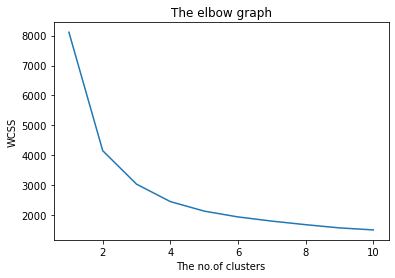

In [13]:
inertia = []
for i in range(1,11):
    print("Starting iteration #", i)
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(distance_train)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia)
plt.title("The elbow graph")
plt.xlabel("The no.of clusters")
plt.ylabel("WCSS")
plt.show()

In [14]:
model_train = KMeans(n_clusters=3, init='k-means++', max_iter=1000, n_init=10).fit(distance_train)

In [15]:
print(model_train.labels_)

[2 1 2 ... 0 0 0]


In [16]:
train_data = pickle.load(open('./lmg/train.pkl', 'rb'))
log_msg = train_data[0]

In [17]:
cluster_zero, cluster_one, cluster_two, index = [], [], [], 0
for i in model_train.labels_:
    if i == 0:
        cluster_zero.append(log_msg[index])
    elif i == 1:
        cluster_one.append(log_msg[index])
    elif i == 2:
        cluster_two.append(log_msg[index])
    index+=1

In [18]:
cluster_zero

['bumping up version',
 'updated version',
 'add STORM - 1499 to CHANGELOG . md',
 'add design',
 "don ' t use atexit , causes problems .",
 'Added translation using Weblate ( Uzbek )',
 'Use the release version rather than the snapshot version when tagging',
 'changed the inner class to static',
 'revert the buildozer tests',
 'Add deskshare object to meetings',
 'LEP - 6067 - Consolidating the Sharing links ( forgot the actual sharing image . . . )',
 "Don ' t upload anything if - PnoUpload ( helpful for testing promotion build ) .",
 'Add PSD for GreenDroid',
 'Correct the version of jsr305 in README . md',
 'remove blank line',
 'see 08 / 22 log',
 'updated widget frame 9 patch',
 'Added John Wagenleitner to the contributors',
 'upgrade okhttp 3 . 1 . 2 - > 3 . 2 . 0',
 'Move Bike P + R builder to correct location .',
 'revert change to test / cassandra .',
 'Edited audio - test . mp3 to 10 seconds',
 'Remove unused constant from TWLayoutManager',
 'LPS - 45608 path / activities / 

In [19]:
cluster_one

['Fix WTF when creating a lazily initialized connection',
 'ignore microsoft - translator 1 . 0 . 0 prep next',
 'bump common ref',
 'Fixed a bug where the notification scroller could crash .',
 'JAL - 35 Add image notes to non - proprietary licenses',
 'Emulate FileFilter',
 'Fix for truncated sentence in " Find on Page " field',
 'Add minSdkVersion to dslv lib to avoid read phone state permission .',
 'Add cdma_rmnet4 to list of monitored interfaces',
 'Fix stupid copy / paste typo .',
 'Add help .',
 'Adding top level .',
 'updated url of install doc',
 'Fixed issue # 3304',
 'adding mkmf . log to gitignore',
 'include windows batch files in zipDist',
 'removed empty line .',
 'Disallow usage of maven 3 . 1 . x ( and higher ) because of non compability with plugins',
 'Add image for screen density chart',
 'Reduce the number of tests before fork in CI',
 'Did not update project . version correctly .',
 'temporarily disable unit test',
 'Removed string resources from lib',
 'Fixes an

In [20]:
cluster_two

['Added intro image .',
 'renamed test .',
 'Added a screenshot of the app in action ( without images )',
 'deleted android_bluetooth_ScoSocket . cpp from makefile',
 'fixing README',
 'Raise visibility of Netty Channel Builder Ctor',
 'IDEA - 82242 Scroll the tabs with mouse wheel',
 'Resolve # 215 Update readme for @ Index annotation',
 'Fixing pom . xml for Maven 3 . 1 .',
 'fixed PY - 13561 Hang on New Project action',
 'Move worldedit . properties to defaults folder so it extracts properly',
 "Add @ Incubating to override of API ' withCancellationToken '",
 'Removed an unnecessary line introduced into CHANGES . txt by change r1087844',
 'Return the child JVM exit code to the parent process to handle the error conditions ( Kanna Karanam via Ashutosh Chauhan )',
 'Fix typo .',
 'Smack 4 . 2 . 0 - alpha1 - SNAPSHOT',
 'Ignoring all workspace . xml files .',
 'remove unused lib',
 'Add Bruce for C # report',
 'add todos',
 'make round avatars a little bigger with a smaller border',
 '

In [21]:
svd = TruncatedSVD(n_components=2)
svd.fit(distance_train)
matrix_svd = svd.transform(distance_train)
centers = svd.transform(model_train.cluster_centers_)

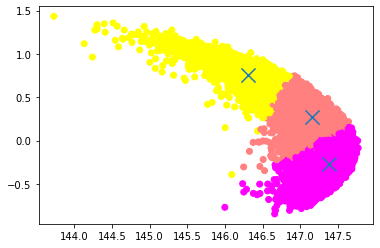

In [22]:
plt.scatter(matrix_svd[:,0],matrix_svd[:,1],c=model_train.labels_,cmap = 'spring')
plt.scatter(centers[:,0],centers[:,1],marker = 'x',s = 200)

In [23]:
model_train_pca = KMeans(n_clusters=3, init='k-means++', max_iter=1000, n_init=10).fit(distance_train_pca)

In [24]:
print(model_train_pca.labels_)

[1 1 1 ... 2 2 2]


In [25]:
pca_zero, pca_one, pca_two, index = [], [], [], 0
for i in model_train_pca.labels_:
    if i == 0:
        pca_zero.append(log_msg[index])
    elif i == 1:
        pca_one.append(log_msg[index])
    elif i == 2:
        pca_two.append(log_msg[index])
    index+=1

In [26]:
pca_zero

['ignore microsoft - translator 1 . 0 . 0 prep next',
 'bumping up version',
 "don ' t use atexit , causes problems .",
 'Added translation using Weblate ( Uzbek )',
 'Use the release version rather than the snapshot version when tagging',
 'Fixed a bug where the notification scroller could crash .',
 'JAL - 35 Add image notes to non - proprietary licenses',
 'Add deskshare object to meetings',
 'LEP - 6067 - Consolidating the Sharing links ( forgot the actual sharing image . . . )',
 "Don ' t upload anything if - PnoUpload ( helpful for testing promotion build ) .",
 'Add PSD for GreenDroid',
 'remove blank line',
 'see 08 / 22 log',
 'Added John Wagenleitner to the contributors',
 'Move Bike P + R builder to correct location .',
 'revert change to test / cassandra .',
 'include windows batch files in zipDist',
 'Fix permissions',
 'Disallow usage of maven 3 . 1 . x ( and higher ) because of non compability with plugins',
 'Add set - eu to scala versions script',
 'Fix testdata',
 'Re

In [27]:
pca_one

['Added intro image .',
 'Fix WTF when creating a lazily initialized connection',
 'renamed test .',
 'Added a screenshot of the app in action ( without images )',
 'deleted android_bluetooth_ScoSocket . cpp from makefile',
 'fixing README',
 'bump common ref',
 'Raise visibility of Netty Channel Builder Ctor',
 'Emulate FileFilter',
 'Fix for truncated sentence in " Find on Page " field',
 'IDEA - 82242 Scroll the tabs with mouse wheel',
 'Add minSdkVersion to dslv lib to avoid read phone state permission .',
 'Add cdma_rmnet4 to list of monitored interfaces',
 'Fix stupid copy / paste typo .',
 'Add help .',
 'Adding top level .',
 'updated url of install doc',
 'Fixed issue # 3304',
 'adding mkmf . log to gitignore',
 'removed empty line .',
 'Resolve # 215 Update readme for @ Index annotation',
 'Add image for screen density chart',
 'Reduce the number of tests before fork in CI',
 'Fixing pom . xml for Maven 3 . 1 .',
 'Did not update project . version correctly .',
 'temporarily 

In [28]:
pca_two

['updated version',
 'add STORM - 1499 to CHANGELOG . md',
 'add design',
 'changed the inner class to static',
 'revert the buildozer tests',
 'Correct the version of jsr305 in README . md',
 'updated widget frame 9 patch',
 'upgrade okhttp 3 . 1 . 2 - > 3 . 2 . 0',
 'Edited audio - test . mp3 to 10 seconds',
 'Remove unused constant from TWLayoutManager',
 'LPS - 45608 path / activities / rss should not require authentication',
 'update README . md for version 0 . 1 . 3',
 'LPS - 65749 prep next , use latest',
 'use empty array instance rather than brand new array',
 'Rename README - ZH .',
 'prepare for next development iteration',
 'remove unused enum value',
 'fix git commit failing',
 'Fix chmod ( # 41 )',
 'Set minSdkVersion + targetSdkVersion via build . gradle',
 'Added missing call to super . close ( ) .',
 'Amend release notes for 23 - beta4 .',
 'make shared variable volatile',
 'update example url',
 'Add hdpi and xhdpi dark collected icon .',
 'Removed non - needed import

In [29]:
svd = TruncatedSVD(n_components=2)
svd.fit(distance_train_pca)

matrix_svd = svd.transform(distance_train_pca)
centers = svd.transform(model_train_pca.cluster_centers_)

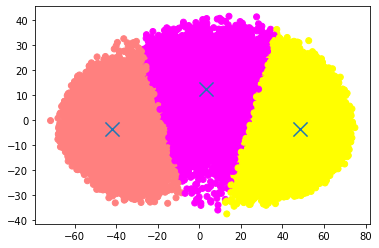

In [30]:
plt.scatter(matrix_svd[:,0],matrix_svd[:,1],c=model_train_pca.labels_,cmap = 'spring')
plt.scatter(centers[:,0],centers[:,1],marker = 'x',s = 200)

In [31]:
def jaccard(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

def get_list(l):
    l2 = []
    for i in arr:
        l2.append(jaccard(l, i))
    return l2

arr = [cluster_zero, cluster_one, cluster_two, pca_zero, pca_one, pca_two]

js = pd.DataFrame({'cluster 0': get_list(cluster_zero),
                   'cluster 1': get_list(cluster_one),
                   'cluster 2': get_list(cluster_two),
                   'pca 0': get_list(pca_zero),
                   'pca 1': get_list(pca_one),
                   'pca 2': get_list(pca_two)},
                  index=['ZERO', 'ONE', 'TWO', 'PCA 0', 'PCA 1', 'PCA 2'])
js

,cluster 0,cluster 1,cluster 2,pca 0,pca 1,pca 2
ZERO,1.000000,0.031343,0.016890,0.348206,0.035286,0.642494
ONE,0.031343,1.000000,0.017855,0.149125,0.608787,0.029455
TWO,0.016890,0.017855,1.000000,0.018694,0.297732,0.019432
PCA 0,0.348206,0.149125,0.018694,1.000000,0.029321,0.028448
PCA 1,0.035286,0.608787,0.297732,0.029321,1.000000,0.030725
PCA 2,0.642494,0.029455,0.019432,0.028448,0.030725,1.000000


## TEST CLUSTERING

In [32]:
model = KMeans(n_clusters=3, init='k-means++', max_iter=1000, n_init=10)
model.fit(distance_test)
pred_test = model.predict(distance_test)

In [33]:
vd = TruncatedSVD(n_components=2)
svd.fit(distance_test)

matrix_svd = svd.transform(distance_test)
centers = svd.transform(model.cluster_centers_)

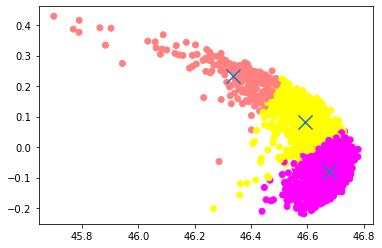

In [34]:
plt.scatter(matrix_svd[:,0],matrix_svd[:,1],c=pred_test,cmap = 'spring')
plt.scatter(centers[:,0],centers[:,1],marker = 'x',s = 200)

In [35]:
model.fit(distance_test_pca)
pred_test_pca = model.predict(distance_test_pca)

In [36]:
svd = TruncatedSVD(n_components=2)
svd.fit(distance_test_pca)

matrix_svd = svd.transform(distance_test_pca)
centers = svd.transform(model.cluster_centers_)

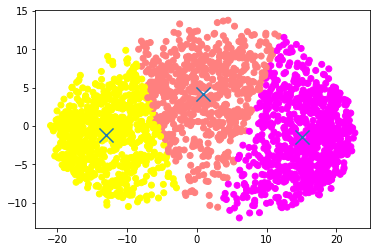

In [37]:
plt.scatter(matrix_svd[:,0],matrix_svd[:,1],c=pred_test_pca,cmap = 'spring')
plt.scatter(centers[:,0],centers[:,1],marker = 'x',s = 200)